On this notebook, we perform an EDA to explore the [100,000 UK Used Car Dataset](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes) (toyota.csv) dataset we're using for this project to identify the data cleaning steps that we  need to perform and creating a baseline model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("toyota.csv")

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
#df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,_gt86,2016,16000,manual,24089,petrol,265,36.2,2.0
1,_gt86,2017,15995,manual,18615,petrol,145,36.2,2.0
2,_gt86,2015,13998,manual,27469,petrol,265,36.2,2.0
3,_gt86,2017,18998,manual,14736,petrol,150,36.2,2.0
4,_gt86,2017,17498,manual,36284,petrol,145,36.2,2.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


We have 9 features and no missing values

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


# **Data distribution**

Checking  the distributation of the target variable.

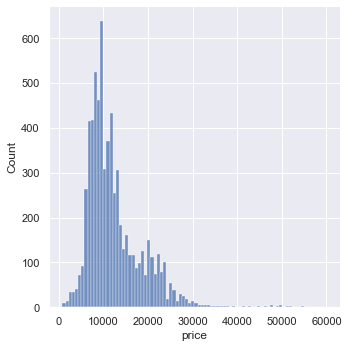

In [8]:
sns.displot(x="price", data=df)

We can show a few outliers but the distribution of the target is kind of normal.


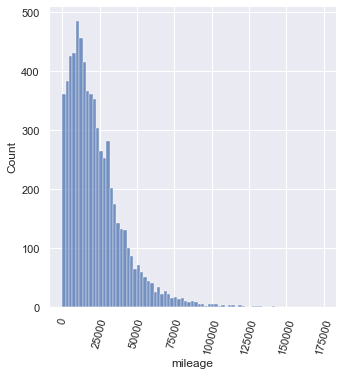

In [9]:
sns.displot(x="mileage", data=df)
plt.xticks(rotation=75);

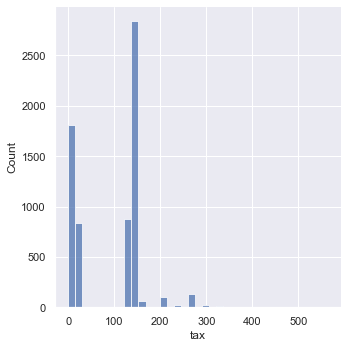

In [10]:
sns.displot(x="tax", data=df)

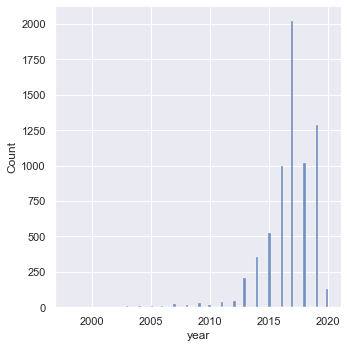

In [11]:
sns.displot(x="year", data=df)

<AxesSubplot:xlabel='count', ylabel='engineSize'>

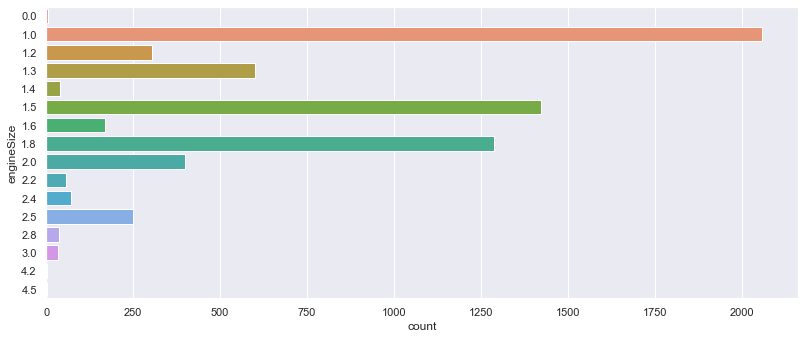

In [13]:
sns.countplot(y="engineSize", data=df)


<AxesSubplot:xlabel='count', ylabel='model'>

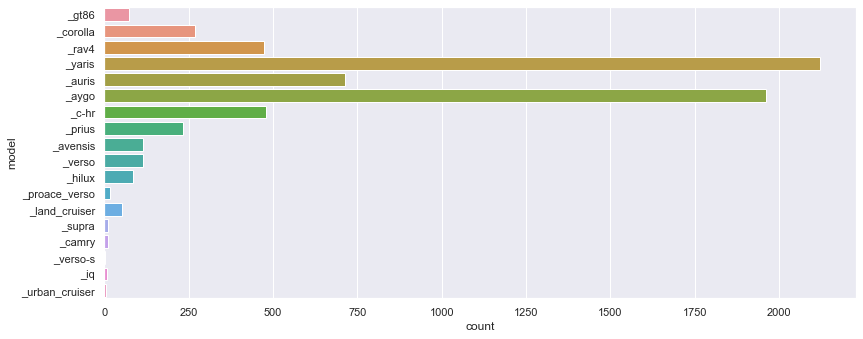

In [14]:
sns.countplot(y="model", data=df)

In [15]:
df['model'].value_counts()

_yaris            2122
_aygo             1961
_auris             712
_c-hr              479
_rav4              473
_corolla           267
_prius             232
_avensis           115
_verso             114
_hilux              86
_gt86               73
_land_cruiser       51
_proace_verso       15
_supra              12
_camry              11
_iq                  8
_urban_cruiser       4
_verso-s             3
Name: model, dtype: int64

In [16]:
df['model'].nunique()

18

In [17]:
# Remove white spaces
df['model'] = df['model'].str.replace("\s+", "", regex=True)

# Convert text to lowercase
df['model'] = df['model'].str.lower()

In [18]:
df['model'].nunique()

18

<AxesSubplot:xlabel='count', ylabel='transmission'>

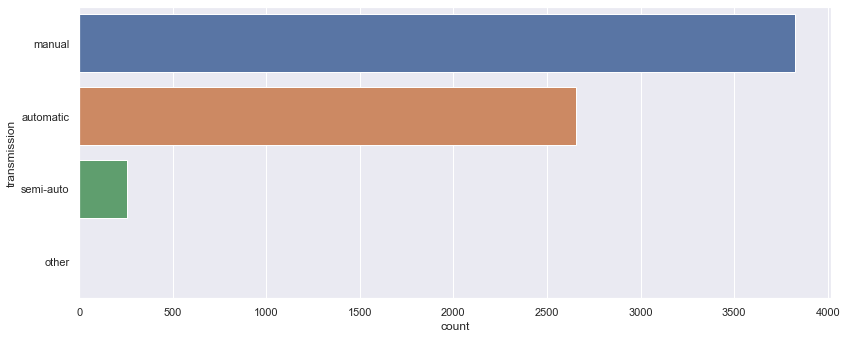

In [19]:
sns.countplot(y='transmission', data=df)


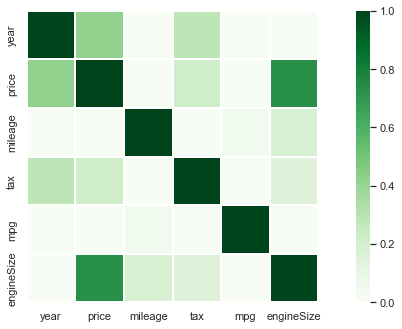

In [20]:
corr = df.corr();

sns.heatmap(corr, vmin=0, vmax=1, linewidths=2, square=True, cmap='Greens');

we explore the relationship among price and the categorical variables.

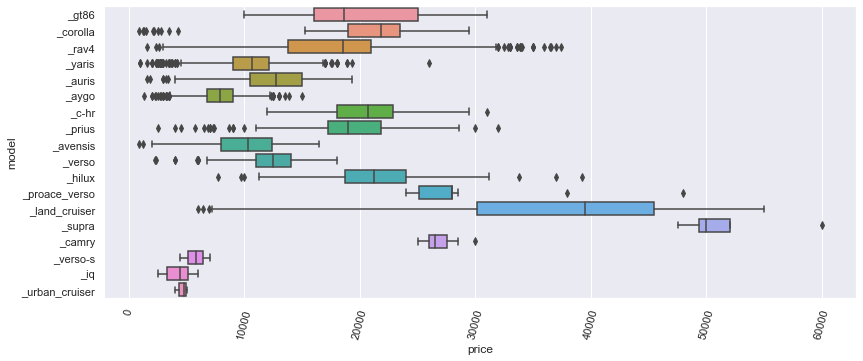

In [21]:
sns.boxplot(x='price', y='model', data=df)
plt.xticks(rotation=75);


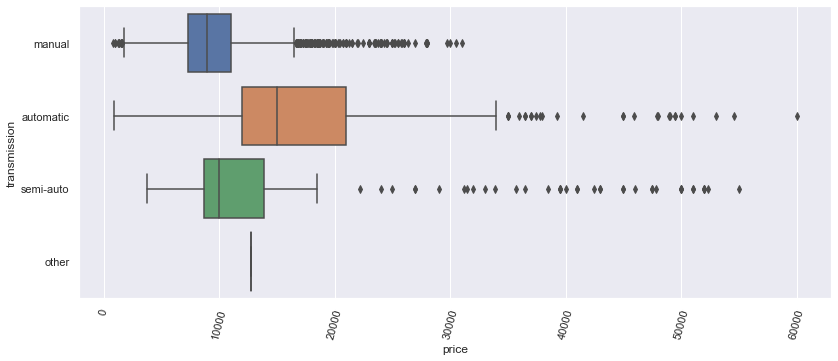

In [22]:
sns.boxplot(x='price', y='transmission', data=df)
plt.xticks(rotation=75);

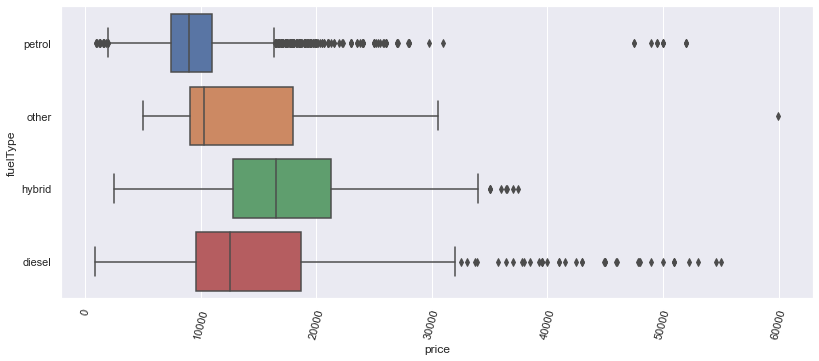

In [23]:
sns.boxplot(x='price', y='fuelType', data=df)
plt.xticks(rotation=75);


# **Outlier analysis**

Now, we look further into outliers.

In [26]:
df[df.year < 2022]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,_gt86,2016,16000,manual,24089,petrol,265,36.2,2.0
1,_gt86,2017,15995,manual,18615,petrol,145,36.2,2.0
2,_gt86,2015,13998,manual,27469,petrol,265,36.2,2.0
3,_gt86,2017,18998,manual,14736,petrol,150,36.2,2.0
4,_gt86,2017,17498,manual,36284,petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,_iq,2011,5500,automatic,30000,petrol,20,58.9,1.0
6734,_urban_cruiser,2011,4985,manual,36154,petrol,125,50.4,1.3
6735,_urban_cruiser,2012,4995,manual,46000,diesel,125,57.6,1.4
6736,_urban_cruiser,2011,3995,manual,60700,petrol,125,50.4,1.3
